Step 1: Imports

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

companies= pd.read_csv(r'd:\\ADRIAN\\Jupyter\\Unicorn_Companies.csv', engine='pyarrow')

Step 2: Data exploration

In [35]:
# Display the first 10 rows of the data.
companies.head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,None,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0
5,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2012.0,$571.26M,None,26.0,8.0,NaN
6,Checkout.com,$40,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",2012.0,$1.83B,None,15.0,4.0,NaN
7,Instacart,$39,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",2012.0,$2.686B,None,29.0,12.0,NaN
8,Databricks,$38,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2013.0,$3.497B,None,29.0,8.0,NaN
9,Revolut,$33,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",2015.0,$1.716B,None,31.0,6.0,NaN


In [36]:
# Identify the number of rows and columns in the dataset.
companies.shape

(1037, 13)

In [37]:
# Check for duplicates.
companies.drop_duplicates().shape

(1037, 13)

In [38]:
# Display the data types of the columns.
companies.dtypes

Company               object
Valuation ($B)        object
Date Joined           object
Country               object
City                  object
Industry              object
Select Inverstors     object
Founded Year         float64
Total Raised          object
Financial Stage       object
Investors Count      float64
Deal Terms           float64
Portfolio Exits      float64
dtype: object

In [39]:
# Sort `companies` and display the first 10 rows of the resulting DataFrame.
companies.sort_values(by="Founded Year", ascending=False).head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
766,GlobalBees,$1.1,12/28/2021,India,New Delhi,E-commerce & direct-to-consumer,"Chiratae Ventures, SoftBank Group, Trifecta Ca...",2021.0,$291.5M,None,8.0,1.0,NaN
599,Yidian Zixun,$1.4,10/17/2017,China,Beijing,Mobile & telecommunications,"Phoenix New Media, Tianjin Haihe Industry Fund",2021.0,$15M,None,2.0,NaN,NaN
300,Flink,$2.85,12/1/2021,Germany,Berlin,E-commerce & direct-to-consumer,"Mubadala Capital, Bond, Prosus Ventures",2021.0,$1.042B,None,10.0,1.0,NaN
987,Mensa Brands,$1,11/16/2021,India,Bengaluru,Other,"Accel, Falcon Edge Capital, Norwest Venture Pa...",2021.0,$228.58M,None,13.0,3.0,NaN
443,ClickHouse,$2,10/28/2021,United States,Portola Valley,Data management & analytics,"Lightspeed Venture Partners, Almaz Capital Par...",2021.0,$300M,None,11.0,1.0,NaN
712,Jokr,$1.2,12/2/2021,United States,New York,E-commerce & direct-to-consumer,"GGV Capital, Tiger Global Management, Greycroft",2021.0,$430M,None,15.0,1.0,NaN
561,candy.com,$1.5,10/21/2021,United States,New York,Fintech,"Insight Partners, Softbank Group, Connect Vent...",2021.0,$100M,None,9.0,1.0,NaN
716,Phantom,$1.2,1/31/2022,United States,San Francisco,Fintech,"Paradigm, Andreessen Horowitz, Jump Capital",2021.0,$118.5M,None,9.0,1.0,NaN
553,Pacaso,$1.5,3/24/2021,United States,Cincinnati,Fintech,"Global Founders Capital, Shea Ventures, Greycroft",2020.0,$1.467B,None,16.0,2.0,NaN
1008,Noname Security,$1,12/15/2021,United States,Palo Alto,Cybersecurity,"Insight Partners, Lightspeed Venture Partners,...",2020.0,$220M,None,7.0,1.0,NaN


In [40]:
# Display each unique year that occurs in the dataset
# along with the number of companies that were founded in each unique year.

companies["Founded Year"].value_counts().sort_values(ascending=False)

Founded Year
2015.0    144
2014.0    105
2016.0    101
2012.0     87
2013.0     85
2011.0     76
2017.0     67
2018.0     55
2010.0     37
2019.0     34
2009.0     33
2008.0     23
2020.0     23
2007.0     23
2005.0     15
2006.0     13
2000.0     12
2004.0      8
2001.0      8
1999.0      8
2021.0      8
2003.0      7
1998.0      4
2002.0      3
1992.0      2
1994.0      2
1995.0      2
1996.0      1
1919.0      1
1991.0      1
1973.0      1
1979.0      1
1984.0      1
1990.0      1
1997.0      1
1993.0      1
Name: count, dtype: int64

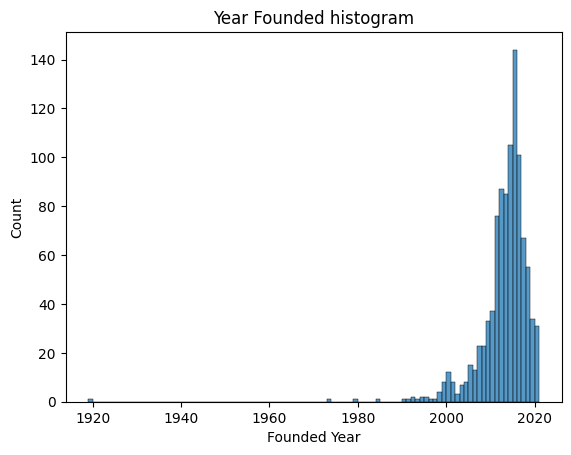

In [41]:
sns.histplot(data=companies, x='Founded Year')
plt.title('Year Founded histogram');

In [42]:
# Convert `Date Joined` column to datetime.
# Update the column with the converted values.

companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])

# Display the data types of the columns in `companies`
# to confirm that the update actually took place

companies.dtypes

Company                      object
Valuation ($B)               object
Date Joined          datetime64[ns]
Country                      object
City                         object
Industry                     object
Select Inverstors            object
Founded Year                float64
Total Raised                 object
Financial Stage              object
Investors Count             float64
Deal Terms                  float64
Portfolio Exits             float64
dtype: object

In [43]:
# Obtain the names of the months when companies gained unicorn status.
# Use the result to create a `Month Joined` column.

companies["Month Joined"] = companies["Date Joined"].dt.month_name()

# Display the first few rows of `companies`
# to confirm that the new column did get added.

companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Month Joined
0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0,April
1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,None,29.0,12.0,NaN,December
2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0,January
3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0,December
4,Epic Games,$42,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0,October


In [45]:
# Determine how many years it took for companies to reach unicorn status.
companies["Years To Join"] = companies["Date Joined"].dt.year - companies["Founded Year"]
companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Month Joined,Years To Join
0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0,April,5.0
1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,None,29.0,12.0,NaN,December,10.0
2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0,January,4.0
3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0,December,6.0
4,Epic Games,$42,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0,October,27.0


In [46]:
# Filter dataset by a year of your interest (in terms of when companies reached unicorn status).
# Save the resulting subset in a new variable .

companies_2021 = companies[companies["Date Joined"].dt.year == 2021]

# Display the first few rows of the subset to confirm that it was created

companies_2021.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Month Joined,Years To Join
10,FTX,$32,2021-07-20,Bahamas,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",None,2018.0,$1.829B,Acq,40.0,3.0,1.0,July,3.0
15,J&T Express,$20,2021-04-07,Indonesia,Jakarta,"Supply chain, logistics, & delivery","Hillhouse Capital Management, Boyu Capital, Se...",2015.0,$4.653B,None,9.0,3.0,NaN,April,6.0
24,OpenSea,$13.3,2021-07-20,United States,New York,E-commerce & direct-to-consumer,"Andreessen Horowitz, Thirty Five Ventures, Sou...",2017.0,$425.12M,None,26.0,2.0,NaN,July,4.0
32,GoodLeap,$12,2021-10-13,United States,Roseville,Internet software & services,"New Enterprise Associates, BDT Capital Partner...",2003.0,$1.8B,None,8.0,1.0,NaN,October,18.0
34,ZongMu Technology,$11.4,2021-06-03,China,Shanghai,Auto & transportation,"LTW Capital, Legend Capital, Qualcomm Ventures",2013.0,$210.83M,None,19.0,2.0,NaN,June,8.0


In [47]:
#Observe trends over time
companies_2021.insert(3, "Week Joined", companies_2021["Date Joined"].dt.strftime('%Y-W%V'), True)

# Group `companies_2021` by `Week Joined`. 
# Aggregate by counting companies that joined per week of 2021.
# Save the resulting DataFrame in a new variable.
companies_by_week_2021 = companies_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

# Display the first few rows of the new DataFrame to confirm that it was created.

companies_by_week_2021.head()

,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


In [48]:
#Compare trends over time
# Filter by the additional year to create a subset that consists of companies that joined in that year.
companies_2020 = companies[companies["Date Joined"].dt.year == 2020]

# Concatenate the new subset with the subset that you defined previously.
companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])
# Add `Quarter Joined` column to `companies_2021`.
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')
# Convert the `Valuation` column to numeric by removing `$` and `B` and casting each value to data type `float`.
companies_2020_2021["Valuation ($B)"] =  companies_2020_2021["Valuation ($B)"].str.strip("$B").astype(float)
# Group `companies_2020_2021` by `Quarter Joined`, 
# Aggregate by computing average `Funding` of companies that joined per quarter of each year.
# Save the resulting DataFrame in a new variable.
companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation ($B)"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})
companies_by_quarter_2020_2021.head()

,Quarter Joined,Valuation ($B)
0,2020-Q1,3.607647
1,2020-Q2,3.431111
2,2020-Q3,3.817241
3,2020-Q4,3.710000
4,2021-Q1,2.542952


Step 3: Time-to-unicorn visualization

In [49]:
# Define a list that contains months in chronological order.

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]
print(month_order)
            

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


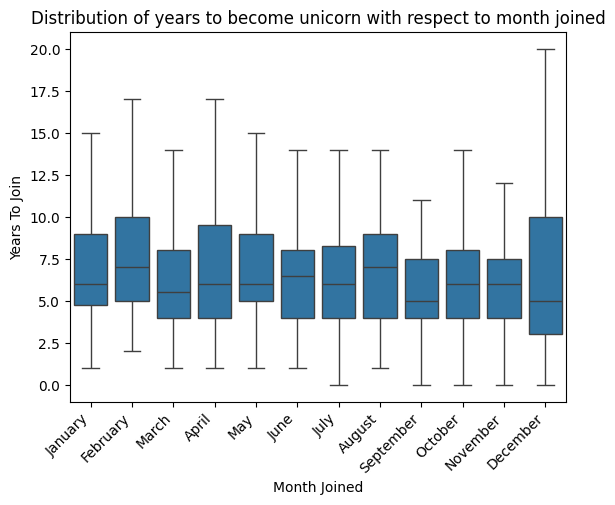

In [50]:
# Create the box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.
sns.boxplot(x=companies['Month Joined'], 
            y=companies['Years To Join'], 
            order=month_order, 
            showfliers=False)
plt.title('Distribution of years to become unicorn with respect to month joined')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

Step 4: Results and evaluation

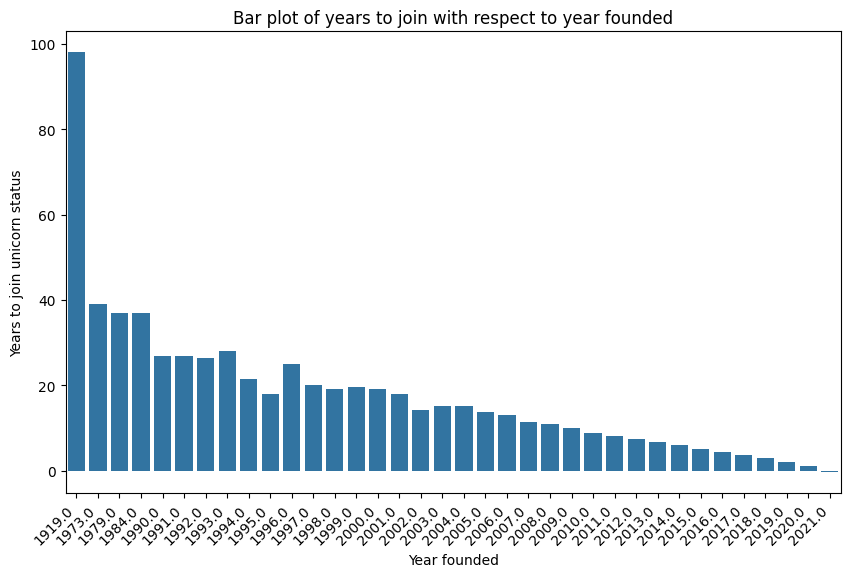

In [53]:
#Visualize the time it took companies to reach unicorn status
plt.figure(figsize=(10,6))
sns.barplot(x=companies["Founded Year"], y=companies["Years To Join"], errorbar=('ci', False))
plt.title("Bar plot of years to join with respect to year founded")
plt.xlabel("Year founded")
plt.ylabel("Years to join unicorn status")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()


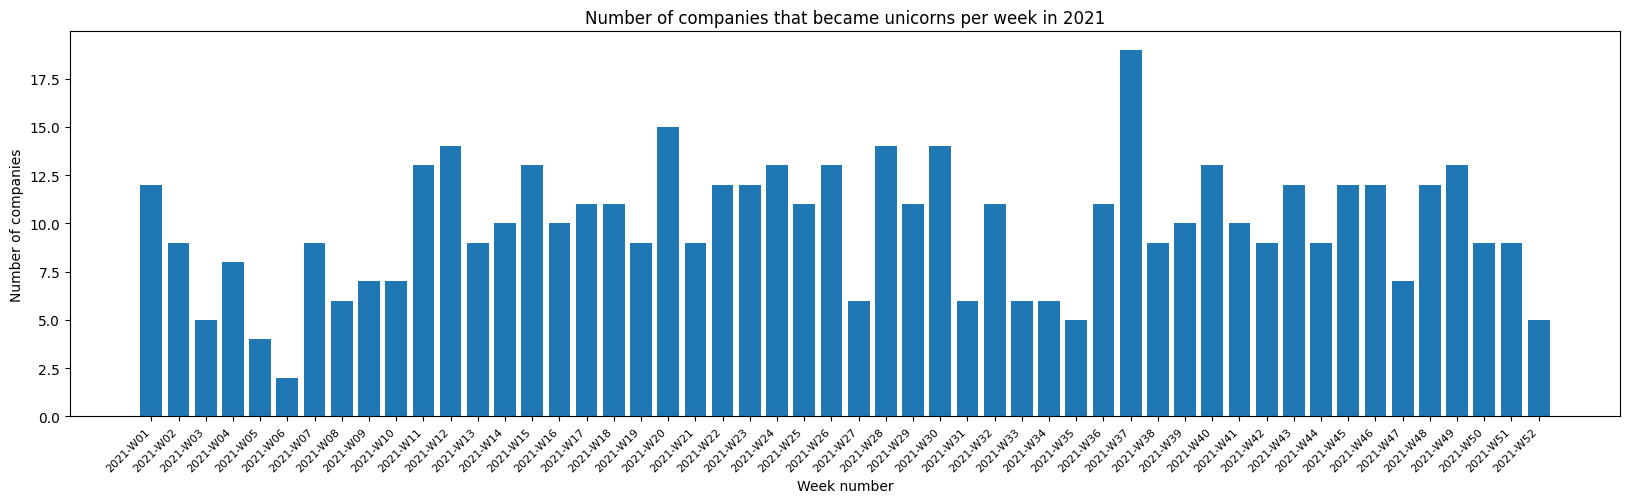

In [54]:
#Visualize the number of companies that joined per interval
plt.figure(figsize = (20, 5))
plt.bar(x=companies_by_week_2021['Week Joined'],height=companies_by_week_2021['Company Count'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of companies")
plt.title("Number of companies that became unicorns per week in 2021")
plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)
plt.show()


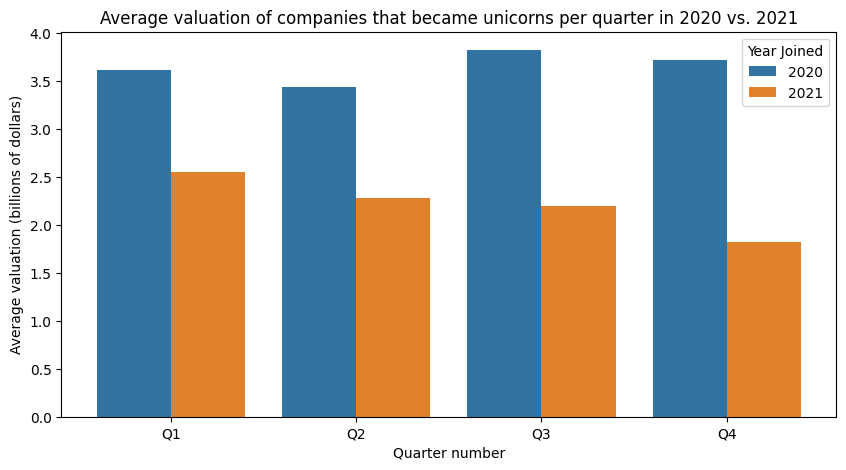

In [56]:
#Visualize the average valuation over the quarters
companies_by_quarter_2020_2021['Quarter Number'] = companies_by_quarter_2020_2021['Quarter Joined'].str[-2:]
companies_by_quarter_2020_2021['Year Joined'] = companies_by_quarter_2020_2021['Quarter Joined'].str[:4]
plt.figure(figsize = (10, 5))
sns.barplot(x=companies_by_quarter_2020_2021['Quarter Number'],
            y=companies_by_quarter_2020_2021['Valuation ($B)'],
            hue=companies_by_quarter_2020_2021['Year Joined'])
plt.plot()
plt.xlabel("Quarter number")
plt.ylabel("Average valuation (billions of dollars)")
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")
plt.show()

There are 1074 unicorn companies represented in this dataset.
2015 is the year when the most number of unicorn companies were founded.
Many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries.
The box plot created shows that companies that become unicorns in the months of September and October have a smaller median value for how long it took to become unicorns.
One of the bar plots created shows that the average valuation of companies that joined in 2020 is highest in the third quarter of the year, whereas the average valuation of companies that joined in 2021 is highest in the first quarter of the year.
According to data analysis that was conducted on a dataset of 1074 unicorn companies, companies that joined in the months of September and October tended to take less time to become unicorns.
Another finding was that many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries. So if the stakeholders want to invest in companies founded in 2021, it would be a good idea to consider companies that belong to these industries, as they may be strong candidates for becoming unicorns.
It was also discovered that the average valuation of companies that joined in 2021 is highest in the first quarter of the year, and the average valuation of companies that joined in 2020 is the third quarter of the year. When considering companies that newly join in the future, it would be worth closely looking at companies that join in the first and third quarters of the year.